# A Real-Time QRS Detection Algorithm
##### Jiapu Pan, Willis J. Tompkins

In [345]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy import signal

In [248]:
data = np.loadtxt("./N_type_beats.txt")
data.shape

(12800,)

In [249]:
Fs = 360; #Sampling Frequency is 360Hz
T = 1/Fs;
N = len(data);  #Number of data is 12800
time = np.linspace(0, N/Fs, 12800);

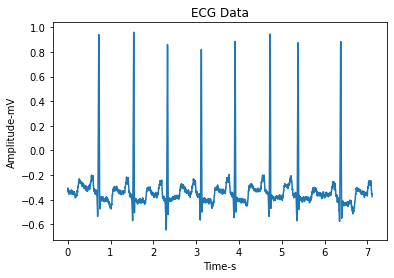

In [250]:
plt.title("ECG Data")
plt.xlabel("Time-s")
plt.ylabel("Amplitude-mV")
plt.plot(time[1:int(len(time)/5)], data[1:int(len(data)/5)])

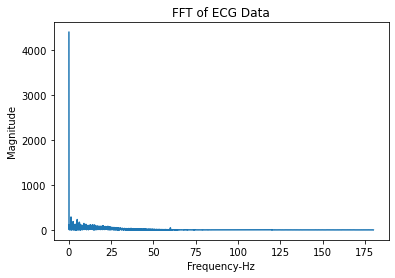

In [251]:
y_f = scipy.fftpack.fft(data)
Y_F = np.abs(y_f)
x_f = np.arange(0, (N/2 -1)) /(N/2) * (Fs/2)

plt.title("FFT of ECG Data")
plt.xlabel("Frequency-Hz")
plt.ylabel("Magnitude")
plt.plot(x_f, Y_F[0:6399])

### BandPass Filter

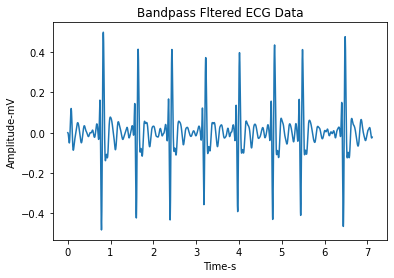

In [252]:
sos = signal.butter(4, (5, 15), 'bp', fs=360, output='sos')
filtered_data = signal.sosfilt(sos, data)

plt.title("Bandpass Fltered ECG Data")
plt.xlabel("Time-s")
plt.ylabel("Amplitude-mV")
plt.plot(time[1:int(len(time)/5)], filtered_data[1:int(len(filtered_data)/5)])

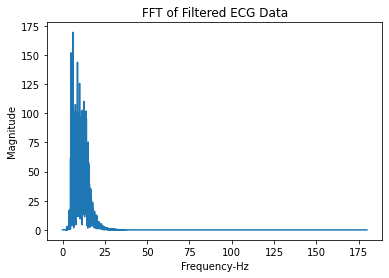

In [253]:
y_f_filtered = scipy.fftpack.fft(filtered_data)
Y_F_filtered = np.abs(y_f_filtered)
x_f = np.arange(0, (N/2 -1)) /(N/2) * (Fs/2)

plt.title("FFT of Filtered ECG Data")
plt.xlabel("Frequency-Hz")
plt.ylabel("Magnitude")
plt.plot(x_f, Y_F_filtered[0:6399])

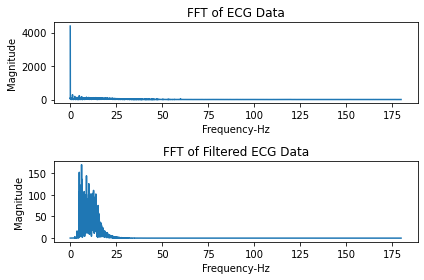

In [256]:
fig, axes = plt.subplots(nrows=2, ncols=1)

plt.subplot(2, 1, 1)
plt.plot(x_f, Y_F[0:6399])
plt.title("FFT of ECG Data")
plt.xlabel("Frequency-Hz")
plt.ylabel("Magnitude")

plt.subplot(2, 1, 2)
plt.plot(x_f, Y_F_filtered[0:6399])
plt.title("FFT of Filtered ECG Data")
plt.xlabel("Frequency-Hz")
plt.ylabel("Magnitude")

fig.tight_layout()
plt.show()

### Derivative

In [273]:
der = np.zeros(N)

Text(0, 0.5, 'Amplitude')

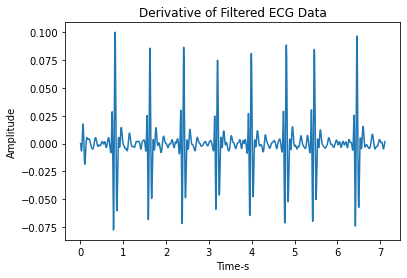

In [274]:
for i in range(3,N-3):
    der[i] = 0.125*(-filtered_data[i-2] - 2*filtered_data[i-1] + 2*filtered_data[i+1] + filtered_data[i+2])

plt.plot(time[1:int(len(time)/5)],der[1:int(len(der)/5)])
plt.title("Derivative of Filtered ECG Data")
plt.xlabel("Time-s")
plt.ylabel("Amplitude")

### Square

In [336]:
square = der**2

#plt.plot(time[1:int(len(time)/5)], square[1:int(len(square)/5)])
#plt.title("Square of Filtered ECG Data")
#plt.xlabel("Time-s")
#plt.ylabel("Amplitude")

### Moving Average

In [337]:
m_1 = np.zeros(N)

for i in range(len(square)):
    summation=0
    for j in range(54):
        if i>j:
            summation = summation + square[i-j]
    m_1[i] = summation/54
m = m_1*100

#plt.plot(time[1:int(len(time)/5)], m[1:int(len(m)/5)])
#plt.title("Moving Average Integration")
#plt.xlabel("Time-s")
#plt.ylabel("Amplitude")

### Delay

Text(0, 0.5, 'Amplitude-mV')

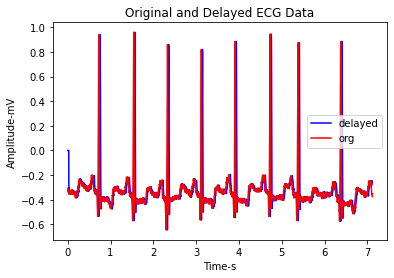

In [338]:
delayed_data = np.zeros(N)

for i in range(N):
    if i<N-10:
        delayed_data[i+10] = data[i]

plt.plot(time[1:int(len(time)/5)], delayed_data[1:int(len(delayed_data)/5)], c='b')
plt.plot(time[1:int(len(time)/5)], data[1:int(len(data)/5)], c='r')
plt.legend(['delayed', 'org'])
plt.title("Original and Delayed ECG Data")
plt.xlabel("Time-s")
plt.ylabel("Amplitude-mV")

Text(0, 0.5, 'Amplitude-mV')

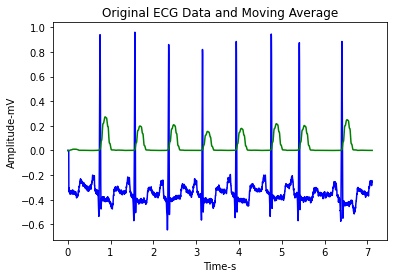

In [288]:
plt.plot(time[1:int(len(time)/5)], delayed_data[1:int(len(delayed_data)/5)], c='b')
plt.plot(time[1:int(len(time)/5)], m[1:int(len(m)/5)], c='g')
plt.title("Original ECG Data and Moving Average")
plt.xlabel("Time-s")
plt.ylabel("Amplitude-mV")

### Multiplication of Delay and Moving Average

In [339]:
multiplication = delayed_data * m

#plt.plot(time[1:int(len(time)/5)], multiplication[1:int(len(multiplication)/5)])
#plt.title("Delayed Data X Moving Average")
#plt.xlabel("Time-s")
#plt.ylabel("Amplitude-mV")

### Pulse Generation

In [340]:
pulse = np.zeros(N)

for i in range(len(multiplication)):
    if multiplication[i] >= 0:
        pulse[i] = 0.3
    else:
        pulse[i] = 0
        
#plt.plot(time[1:int(len(time)/5)], multiplication[1:int(len(multiplication)/5)], c='b')
#plt.plot(time[1:int(len(time)/5)], pulse[1:int(len(pulse)/5)], c='r')
#plt.legend(['multpl', 'pulse'])
#plt.title("Multiplication and Pulse Generator")
#plt.xlabel("Time-s")
#plt.ylabel("Amplitude-mV")

Text(0, 0.5, 'Amplitude-mV')

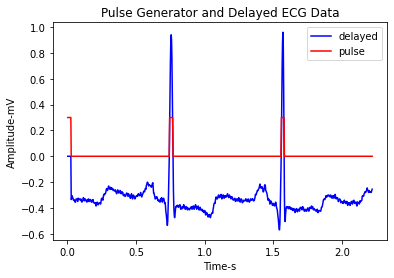

In [317]:
plt.plot(time[1:int(len(time)/16)], delayed_data[1:int(len(delayed_data)/16)], c='b')
plt.plot(time[1:int(len(time)/16)], pulse[1:int(len(pulse)/16)], c='r')
plt.legend(['delayed', 'pulse'])
plt.title("Pulse Generator and Delayed ECG Data")
plt.xlabel("Time-s")
plt.ylabel("Amplitude-mV")

### QRS Detection

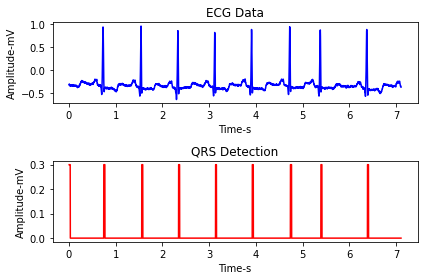

In [331]:
fig, axes = plt.subplots(nrows=2, ncols=1)

plt.subplot(2, 1, 1)
plt.plot(time[1:int(len(time)/5)], data[1:int(len(data)/5)], c='b')
plt.title("ECG Data")
plt.xlabel("Time-s")
plt.ylabel("Amplitude-mV")

plt.subplot(2, 1, 2)
plt.plot(time[1:int(len(time)/5)], pulse[1:int(len(pulse)/5)], c='r')
plt.title("QRS Detection")
plt.xlabel("Time-s")
plt.ylabel("Amplitude-mV")

fig.tight_layout()
plt.show()

### Distances Between R-Peaks

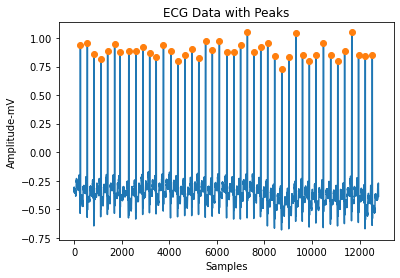

In [462]:
peaks, heights = signal.find_peaks(data, height=0)

plt.title("ECG Data with Peaks")
plt.xlabel("Samples")
plt.ylabel("Amplitude-mV")
plt.plot(data)
plt.plot(peaks,data[peaks], "o")

In [428]:
RR_Distances = np.zeros(len(peaks))
for i in range(len(peaks)-1):
    RR_Distances[i] = peaks[i+1] - peaks[i]
RR_Distances= RR_Distances/Fs

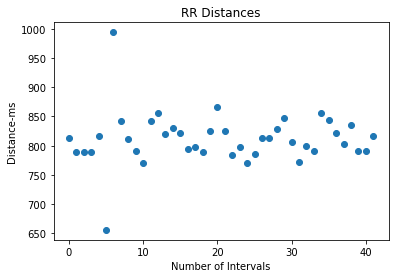

In [441]:
plt.title("RR Distances")
plt.xlabel("Number of Intervals")
plt.ylabel("Distance-ms")

plt.plot(RR_Distances[0:42]*1000, "o")

### Adding Noise on the ECG Data

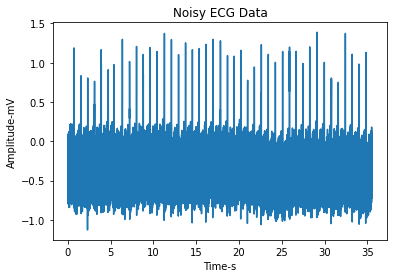

In [539]:
#generate a random signal in a range(-0.5, 0.5)
noise = np.random.uniform(low=-0.5, high=0.5, size=(12800,))
noisy_data = data + noise

plt.title("Noisy ECG Data")
plt.xlabel("Time-s")
plt.ylabel("Amplitude-mV")
plt.plot(time, noisy_data)

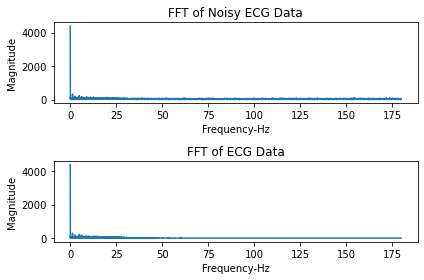

In [540]:
#FFT of Noisy ECG Data

noisy_f = scipy.fftpack.fft(noisy_data)
noisy_F = np.abs(noisy_f)
x_f = np.arange(0, (N/2 -1)) /(N/2) * (Fs/2)


fig, axes = plt.subplots(nrows=2, ncols=1)

plt.subplot(2, 1, 1)
plt.plot(x_f, noisy_F[0:6399])
plt.title("FFT of Noisy ECG Data")
plt.xlabel("Frequency-Hz")
plt.ylabel("Magnitude")

plt.subplot(2, 1, 2)
plt.plot(x_f, Y_F[0:6399])
plt.title("FFT of ECG Data")
plt.xlabel("Frequency-Hz")
plt.ylabel("Magnitude")

fig.tight_layout()
plt.show()

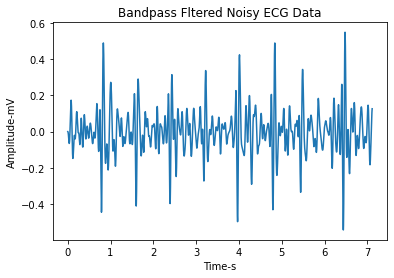

In [541]:
#Bandpass Filtered Noisy ECG Data

filtered_noisy_data = signal.sosfilt(sos, noisy_data)

plt.title("Bandpass Fltered Noisy ECG Data")
plt.xlabel("Time-s")
plt.ylabel("Amplitude-mV")
plt.plot(time[1:int(len(time)/5)], filtered_noisy_data[1:int(len(filtered_noisy_data)/5)])

Text(0, 0.5, 'Amplitude-mV')

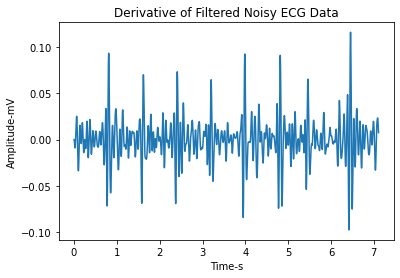

In [542]:
#Derivative of Filtered Noisy Data

der_noisy = np.zeros(N)

for i in range(3,N-3):
    der_noisy[i] = 0.125*(-filtered_noisy_data[i-2] - 2*filtered_noisy_data[i-1] + 2*filtered_noisy_data[i+1] + filtered_noisy_data[i+2])

plt.plot(time[1:int(len(time)/5)],der_noisy[1:int(len(der_noisy)/5)])
plt.title("Derivative of Filtered Noisy ECG Data")
plt.xlabel("Time-s")
plt.ylabel("Amplitude-mV")

In [543]:
#Square of Derivated Noisy Data

square_noisy = der_noisy**2

In [544]:
#Moving Average of Squared Noisy Data

m_1_noisy = np.zeros(N)

for i in range(len(square_noisy)):
    summation_noisy=0
    for j in range(54):
        if i>j:
            summation_noisy = summation_noisy + square_noisy[i-j]
    m_1_noisy[i] = summation_noisy/54
m_noisy = m_1_noisy*100


Text(0, 0.5, 'Amplitude-mV')

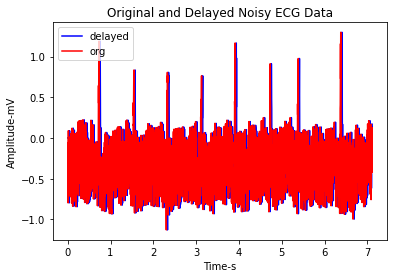

In [545]:
#Delayed Noisy Data

delayed_noisy_data = np.zeros(N)

for i in range(N):
    if i<N-10:
        delayed_noisy_data[i+10] = noisy_data[i]

plt.plot(time[1:int(len(time)/5)], delayed_noisy_data[1:int(len(delayed_noisy_data)/5)], c='b')
plt.plot(time[1:int(len(time)/5)], noisy_data[1:int(len(noisy_data)/5)], c='r')
plt.legend(['delayed', 'org'])
plt.title("Original and Delayed Noisy ECG Data")
plt.xlabel("Time-s")
plt.ylabel("Amplitude-mV")

Text(0, 0.5, 'Amplitude-mV')

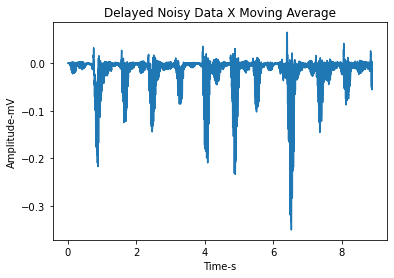

In [553]:
#Multiplication of Delayed Noisy Data and Noisy Moving Average

multiplication_noisy = delayed_noisy_data * m_noisy

plt.plot(time[1:int(len(time)/4)], multiplication_noisy[1:int(len(multiplication_noisy)/4)])
plt.title("Delayed Noisy Data X Moving Average")
plt.xlabel("Time-s")
plt.ylabel("Amplitude-mV")

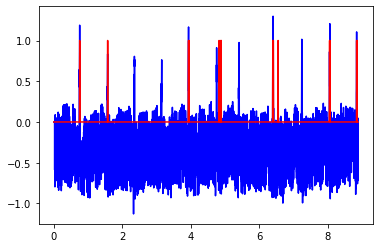

In [561]:
# Pulse Generation 

pulse_noisy = np.zeros(N)

for i in range(len(multiplication_noisy)):
    if multiplication_noisy[i] >= 0.02:
        pulse_noisy[i] = 1
    else:
        pulse_noisy[i] = 0
        
plt.plot(time[1:int(len(time)/4)], delayed_noisy_data[1:int(len(delayed_noisy_data)/4)], c='b')
plt.plot(time[1:int(len(time)/4)], pulse_noisy[1:int(len(pulse_noisy)/4)], c='r')